In [1]:
#importing all the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#importing the dataset
df = pd.read_csv('Diwali sales data.csv', encoding='latin1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
#shape of the dataset
df.shape

(11251, 15)

In [5]:
#getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


since, the Status and Unnamed column consists of only null values, so we will drop them as they won't be of any further use.

# Data preprocessing

In [6]:
#dropping all the irrelevant columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [8]:
#checking if any null value is present or not
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

we can clearly see that the amount column contains 12 null values

In [9]:
#dropping the null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
#checking for duplicates
df.duplicated().sum()

8

hence, the dataset contains 8 duplicate rows

In [12]:
#dropping the duplicate rows
df.drop_duplicates(inplace=True)

# data visualization

Text(0.5, 1.0, 'number of female and male buyers')

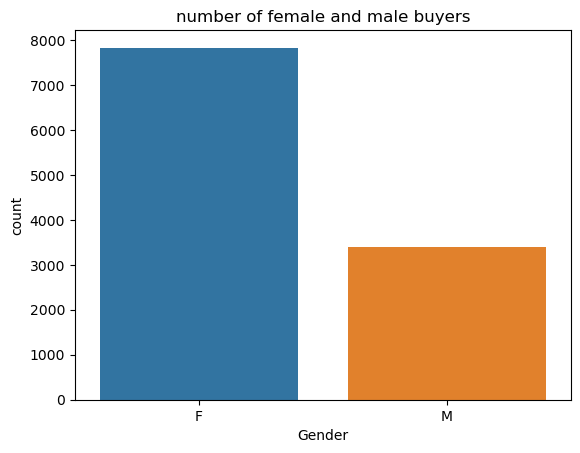

In [13]:
#checking the number of male and female buyers using bar plot

sns.countplot(x='Gender',data=df)
plt.title('number of female and male buyers')

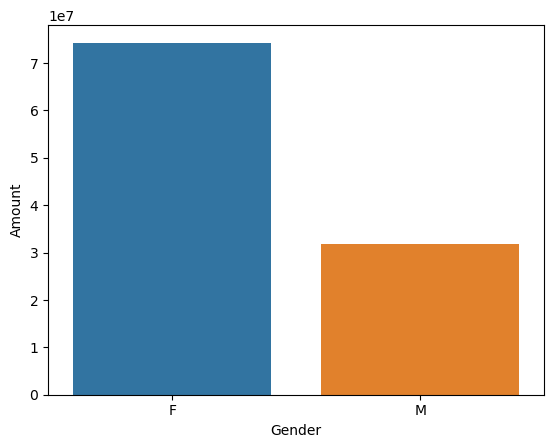

In [14]:
#checking to see who spends more among female and male buyers

spending=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_index()
sns.barplot(x='Gender',y='Amount',data=spending)
plt.show()

clearly female buyers spend more than male buyers

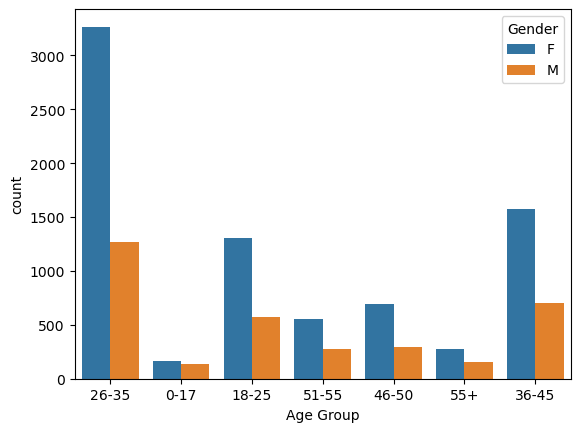

In [15]:
#checking who spends more across all the age-groups

spending_age_group=sns.countplot(data=df,x='Age Group',hue='Gender')


Here also we can see that in every age female buyers spend more than the male buyers. the difference is very significant except the age-group of '0-17' Years

<Axes: xlabel='Age Group', ylabel='Amount'>

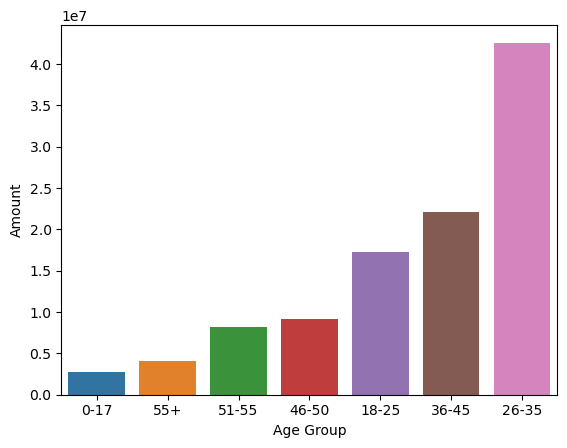

In [16]:
#total amount spend by people from different age-group

age_group=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sns.barplot(x='Age Group',y='Amount',data=age_group)

from the above graph we can clearly see that the maximum buyers are from the age_group of 26 to 35 years

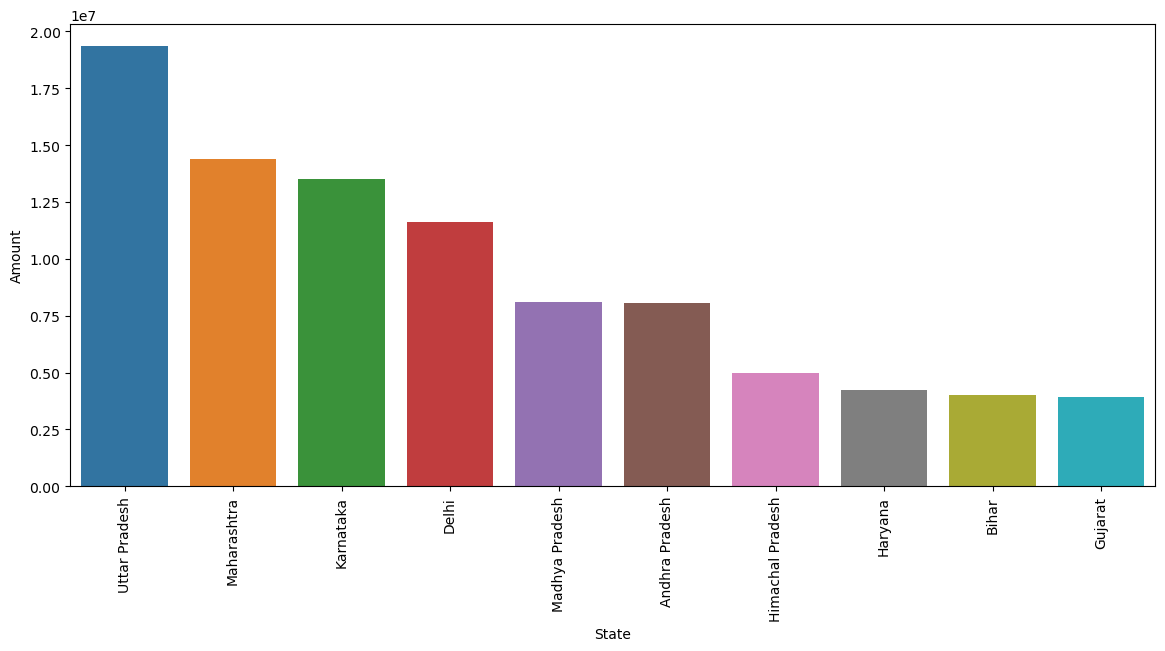

In [17]:
#top 10 state with most total sales amount
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x='State',y='Amount',data=sales_state)
plt.xticks(rotation=90)
plt.show()

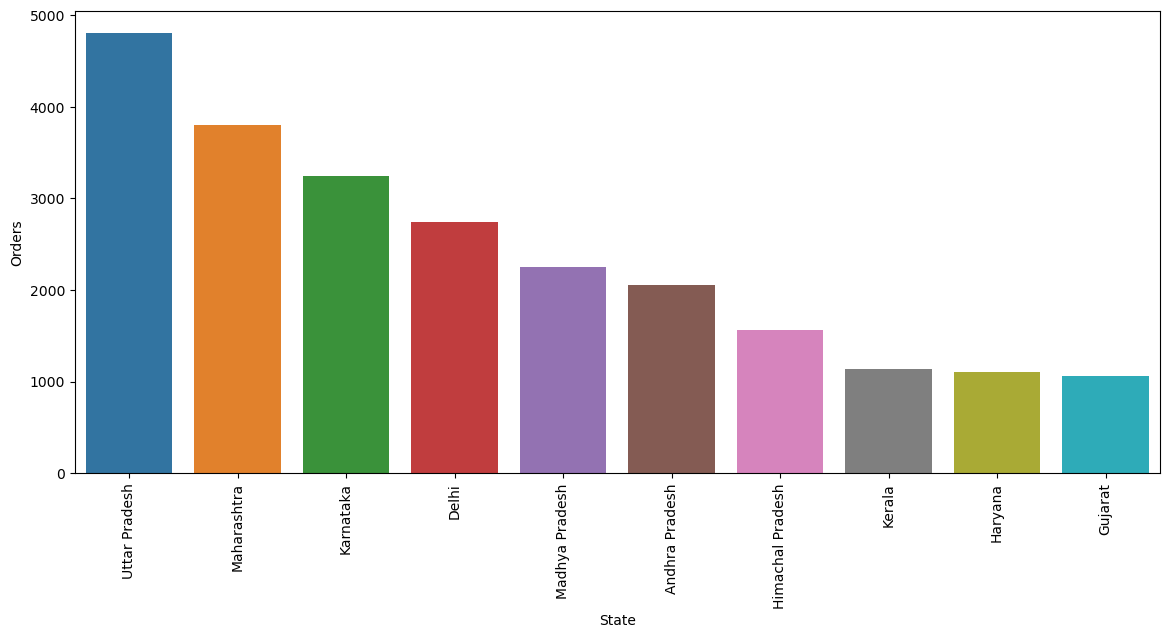

In [18]:
#top 10 states with most total orders
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(14,6))
sns.barplot(x='State',y='Orders',data=sales_state)
plt.xticks(rotation=90)
plt.show()

from the above two bar charts we can clearly see that people from Uttar Pradesh places most orders and Uttar Pradesh has the highest total sales amount

([<matplotlib.axis.XTick at 0x22db45fd650>,
 [Text(1, 0, 'unmarried'), Text(0, 0, 'married')])

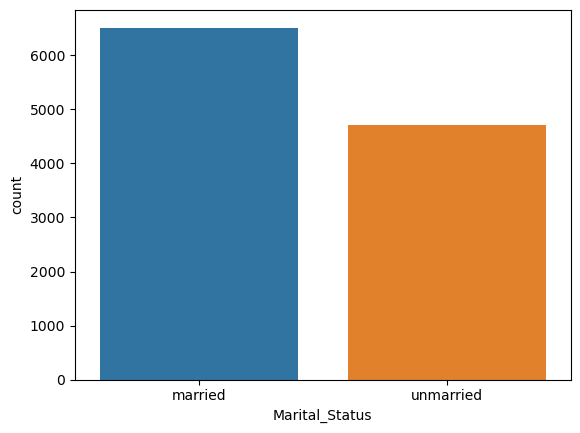

In [19]:
#checking buyers based on marital status

MS=sns.countplot(data=df,x='Marital_Status')
plt.xticks(ticks=[1,0],labels=['unmarried','married'])


([<matplotlib.axis.XTick at 0x22db4607210>,
 [Text(1, 0, 'unmarried'), Text(0, 0, 'married')])

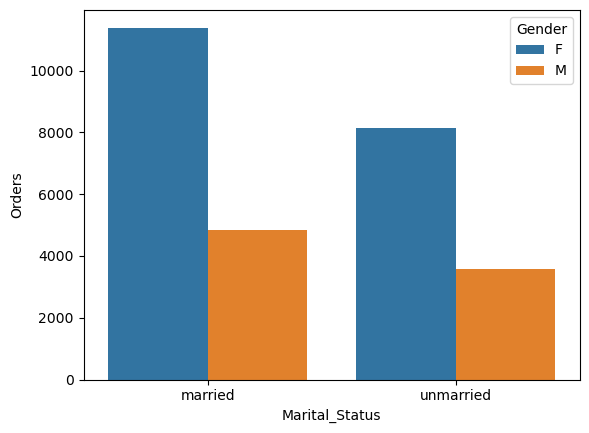

In [20]:
MS_gender=df.groupby(['Marital_Status','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
sns.barplot(x='Marital_Status',y='Orders',data=MS_gender,hue='Gender')
plt.xticks(ticks=[1,0],labels=['unmarried','married'])

so from the above graph we can clearly see most of the buyers are married and most of them are female


<Axes: xlabel='Occupation', ylabel='Amount'>

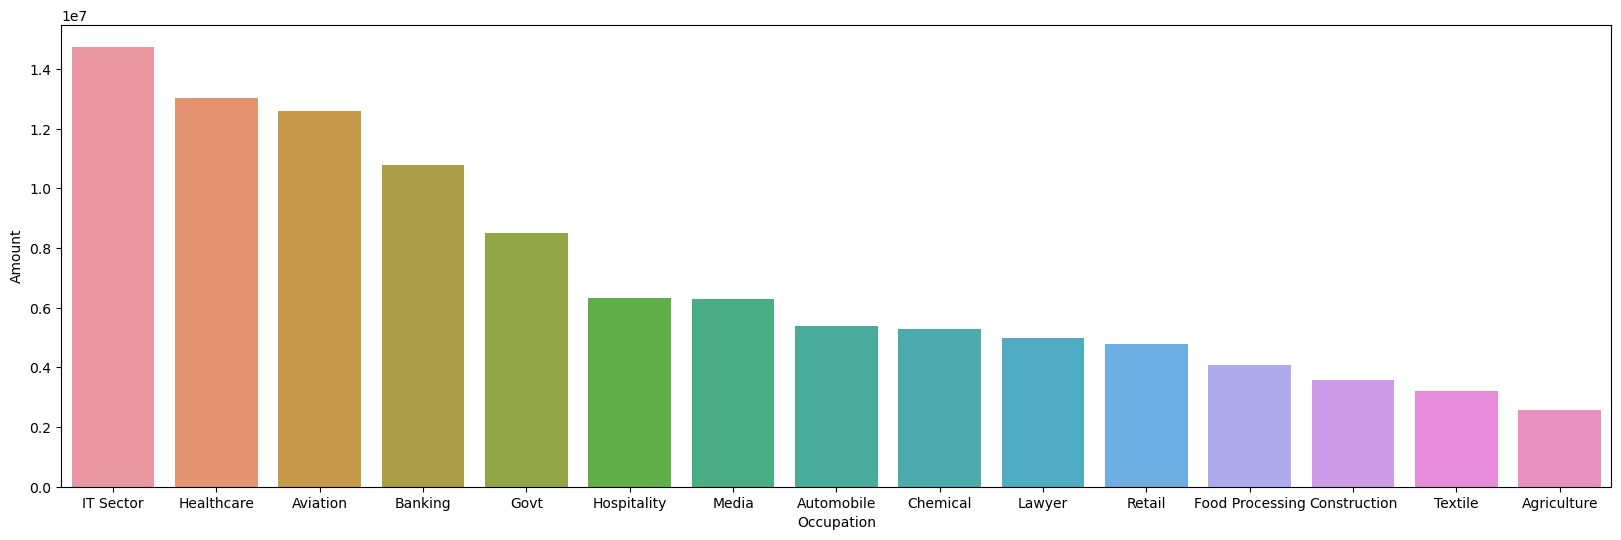

In [21]:
#checking the occupation of the buyers based on amount

occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,6))
sns.barplot(x='Occupation',y='Amount',data=occupation)


so from the above graph we can clearly see that most of the buyers are working in IT sector, Healthcare and Aviation field.

<Axes: xlabel='Product_Category', ylabel='Orders'>

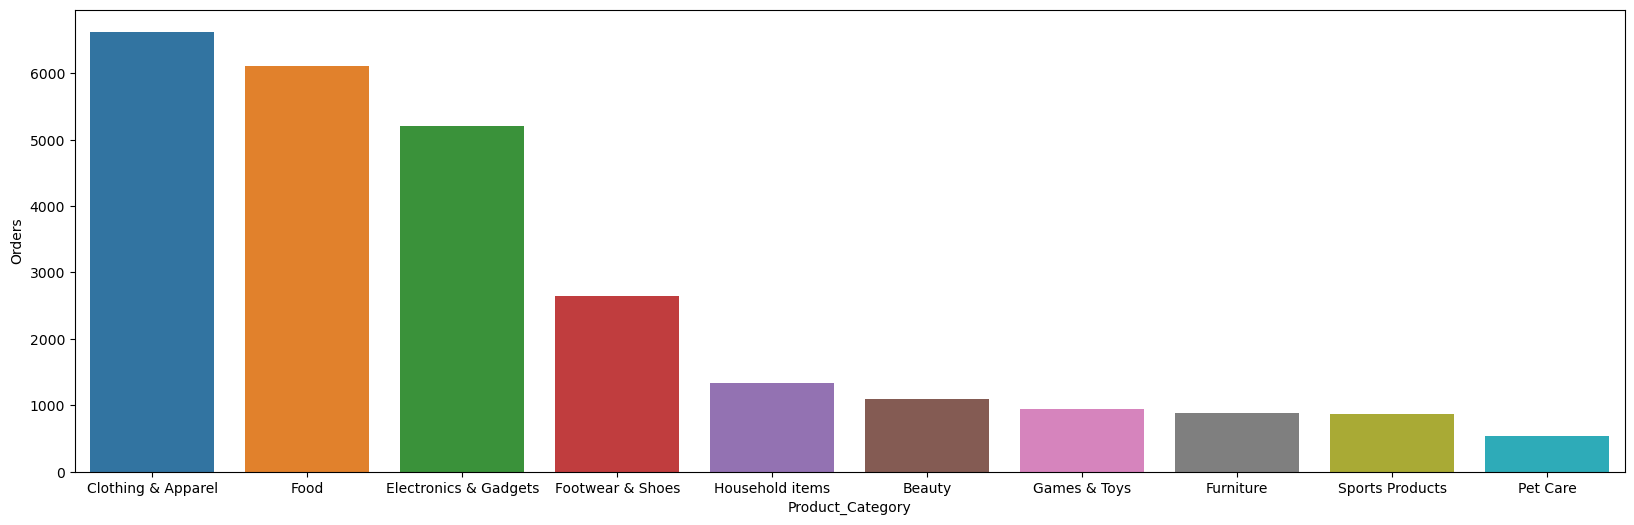

In [22]:
#top 10 most sold products in terms of orders

MS_product=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,6))
sns.barplot(x='Product_Category',y='Orders',data=MS_product)

<Axes: xlabel='Product_Category', ylabel='Amount'>

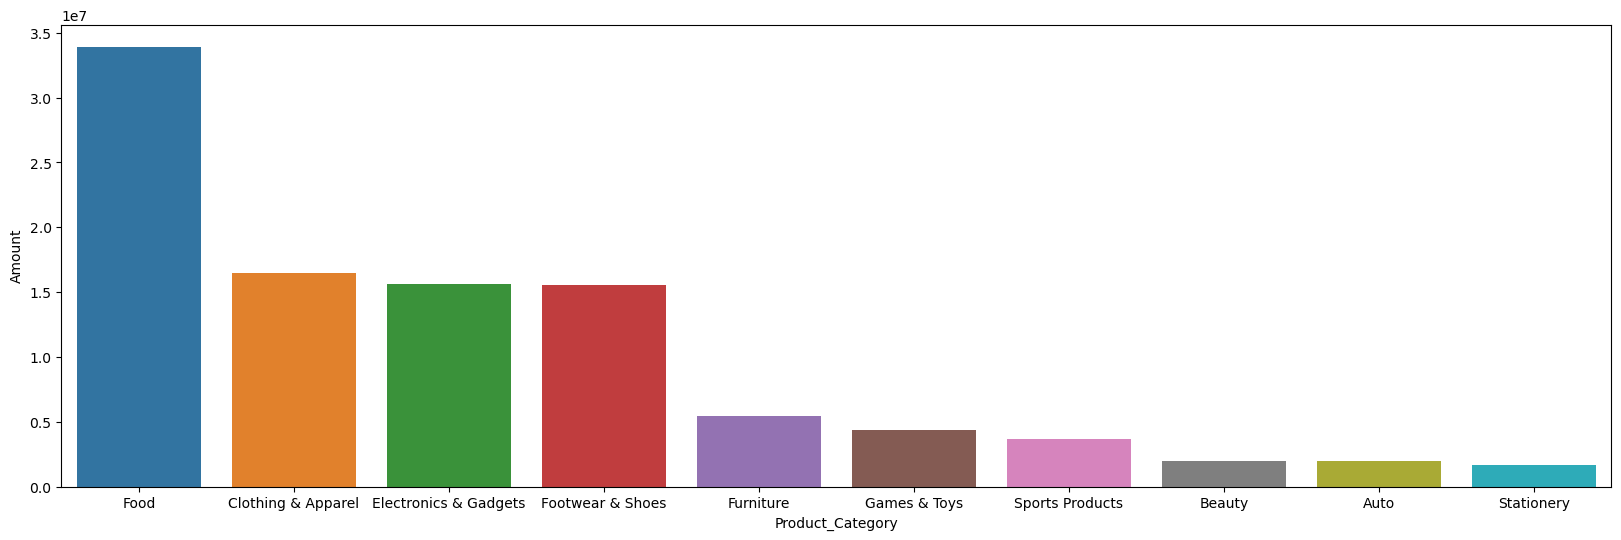

In [23]:
#top 10 most revenue generatring products

MS_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(20,6))
sns.barplot(x='Product_Category',y='Amount',data=MS_product)

from the above two graphs we can clearly see that most of the orders are from clothing and apparel, food and elctronics and gadgets while most revenue generating products are from food, clothing and apparel and electronics and Gadgets in descending order.


conclusion:
    
    After analyzing the data we can conclude that Married women from age group of 26 to 35 years from Uttar Pradesh,Maharashtra and Karnataka working in IT, Healthcare and aviation are more likely to buy products from the product category of Food,clothing and electronics.